In [2]:
import dataframe_image as dfi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option("display.max_column", None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

C:\Users\David Lau\AppData\Local\Temp\ipykernel_17800\972897623.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [18]:
import dataframe_image as dfi
from dataframe_image._screenshot import Screenshot

import subprocess
import io
from pathlib import Path
from tempfile import TemporaryDirectory
from matplotlib import image as mimage

def take_screenshot_override (self):
    temp_dir = TemporaryDirectory()
    temp_html = Path(temp_dir.name) / "temp.html"
    temp_img = Path(temp_dir.name) / "temp.png"
    with open(temp_html, "w") as f:
        f.write(self.html)

    with open(temp_html, "rb") as f:
        args = [
            "--enable-logging",
            "--disable-gpu",
            "--headless",
            "--no-sandbox"
            ]

        if self.ss_width and self.ss_height:
            args.append(f"--window-size={self.ss_width},{self.ss_height}")

        args += [
            "--hide-scrollbars",
            f"--screenshot={str(temp_img)}",
            str(temp_html)
            ]

        subprocess.run(executable=self.chrome_path, args=args)

    with open(temp_img, 'rb') as f:
        img_bytes = f.read()

    buffer = io.BytesIO(img_bytes)
    img = mimage.imread(buffer)
    return self.possibly_enlarge(img)

Screenshot.take_screenshot = take_screenshot_override

In [3]:
datas_US = pd.read_csv('raw_data_US.csv')
datas_CN = pd.read_csv('raw_data_CN.csv')

In [4]:
financials_data = ['revenue', 'debt', 'cash', 
                   'asset', 'equity', 'freeCashFlow', 
                   'operatingCashFlow', 'marketCap']

def div_by_million(data):
    new_data = data
    for c in financials_data:
        new_data[c] = new_data[c] / 1000000
    return new_data

In [5]:
datas_US = div_by_million(datas_US.head(200))
datas_CN = div_by_million(datas_CN.head(200))

C:\Users\David Lau\AppData\Local\Temp\ipykernel_17800\91692513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[c] = new_data[c] / 1000000


In [6]:
new_column_order = ['ticker', 'shortName', 'revenue', 
                    'revenueGrowth', 'earningGrowth', 'grossMargin', 
                    'operatingMargin', 'netMargin', 'eps', 
                    'debt', 'cash', 'asset', 
                    'equity', 'returnOnAsset', 'returnOnEquity', 
                    'debtEquityRatio', 'freeCashFlow', 'operatingCashFlow', 
                    'dividendYield', 'marketCap' ]

In [7]:
datas_US = datas_US[new_column_order]
datas_CN = datas_CN[new_column_order]

In [8]:
datas_US.describe()

,revenue,revenueGrowth,earningGrowth,grossMargin,operatingMargin,netMargin,eps,debt,cash,asset,equity,returnOnAsset,returnOnEquity,debtEquityRatio,freeCashFlow,operatingCashFlow,dividendYield,marketCap
count,200.0000,200.0000,200.0000,180.0000,181.0000,200.0000,196.0000,198.0000,189.0000,200.0000,200.0000,200.0000,200.0000,198.0000,200.0000,200.0000,197.0000,200.0000
mean,56642.5848,0.1193,0.0734,0.4941,0.2160,0.1670,9.0913,34467.7983,11795.1911,163513.0500,32778.2261,0.0878,0.3762,1.7917,6698.0331,10051.4917,0.0198,167447.8522
std,86014.0083,0.1921,2.5347,0.2170,0.1639,0.1482,12.7569,59003.9615,32384.4214,422946.6500,55149.9334,0.0772,1.3620,6.8621,13903.1998,16746.2625,0.0196,320103.6627
min,1577.7950,-0.6476,-21.6136,0.0447,-0.7390,-0.3857,-10.3567,43.9640,76.0000,4380.6790,-15883.0000,-0.2847,-3.0444,-14.5284,-16893.0000,-6397.0000,0.0000,40175.3498
25%,11841.4647,0.0313,-0.2212,0.3367,0.1265,0.0867,2.7900,6909.4445,1231.0000,26917.1000,5942.2550,0.0303,0.0821,0.3512,1535.8000,2730.5000,0.0051,52759.0717
50%,24284.0000,0.0972,0.0409,0.4837,0.1980,0.1526,5.7350,15305.5000,3520.0000,52137.5000,17201.5000,0.0819,0.2115,0.7797,3136.9000,4784.5000,0.0165,77106.0122
75%,60307.2500,0.1926,0.2674,0.6878,0.3088,0.2400,11.2500,38791.7500,9243.0000,117882.0000,35762.5000,0.1369,0.3545,1.6180,6995.0000,9416.7500,0.0291,140108.1610
max,611289.0000,0.8262,17.4294,0.9041,0.6715,1.0399,117.1900,466727.0000,301910.0000,3665743.0000,472360.0000,0.3234,11.7500,58.1497,111443.0000,122151.0000,0.1149,2736141.1072


In [19]:
datas_US.describe().dfi.export('US_datas_summary.png')

In [9]:
datas_CN.describe()

,revenue,revenueGrowth,earningGrowth,grossMargin,operatingMargin,netMargin,eps,debt,cash,asset,equity,returnOnAsset,returnOnEquity,debtEquityRatio,freeCashFlow,operatingCashFlow,dividendYield,marketCap
count,200.0000,200.0000,200.0000,166.0000,166.0000,200.0000,195.0000,200.0000,172.0000,200.0000,200.0000,200.0000,200.0000,200.0000,199.0000,199.0000,189.0000,199.0000
mean,27174.2530,0.1797,-0.4101,0.3280,-0.1036,-0.2436,0.3036,22870.2150,10075.6577,222551.6212,26596.8375,0.0032,-0.0992,1.2972,6403.3401,7781.1347,0.0454,31403.6527
std,56953.9625,0.6108,6.1158,0.3159,2.0960,4.3123,2.3984,52658.7644,24479.7924,721195.6430,60135.6394,0.3744,1.5513,6.9378,23627.8683,24103.7160,0.0577,50584.4247
min,12.7667,-0.7678,-78.6189,-0.9741,-26.5887,-60.7383,-19.3700,1.0668,21.2850,152.1231,-432.6241,-5.0974,-17.3886,-0.0091,-48212.2421,-47398.4869,0.0000,1182.4401
25%,2732.9215,-0.0476,-0.3429,0.1503,0.0222,0.0236,0.0302,441.2825,1334.7480,5807.9641,2929.8021,0.0072,0.0421,0.1437,-112.2493,134.8249,0.0043,6108.8704
50%,7274.7152,0.0619,0.0512,0.2822,0.0770,0.0754,0.1458,3023.9735,2876.5235,18031.5388,6675.9017,0.0266,0.0941,0.4526,391.6003,1014.7587,0.0221,15042.7859
75%,25354.7447,0.1942,0.2285,0.4947,0.1956,0.2508,0.3664,15408.6027,8025.3662,82073.6710,21354.0566,0.0688,0.1505,1.0312,3114.3673,4632.7906,0.0689,30147.2000
max,456419.2572,4.2782,21.3430,0.9572,0.8342,0.6815,23.3500,303047.1802,256630.2613,5448370.9766,462249.9312,0.3405,0.5469,97.5571,191326.5475,193212.7923,0.3150,386215.6411


In [22]:
datas_CN.describe().dfi.export('CN_datas_summary.png')

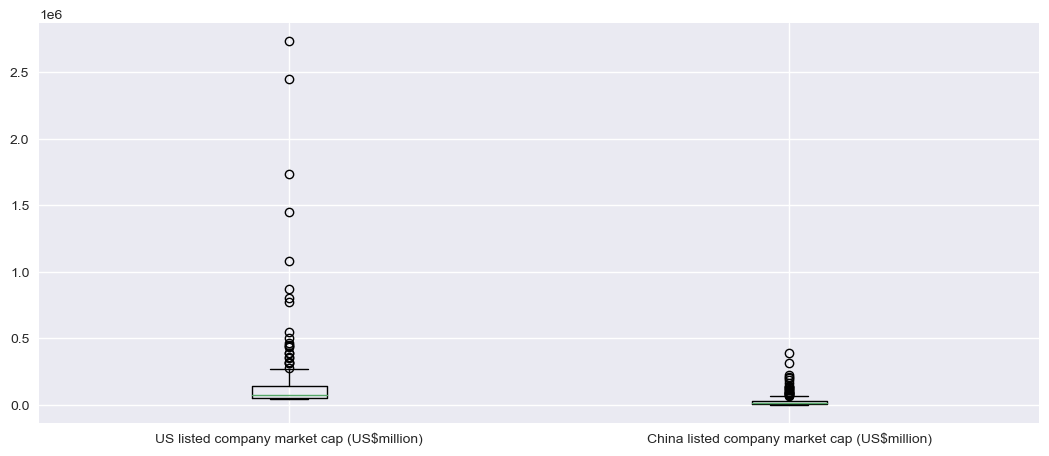

In [23]:
data_1 = np.array(datas_US['marketCap'].dropna())
data_2 = np.array(datas_CN['marketCap'].dropna())
data = [data_1, data_2]

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(data)

ax.set_xticklabels(['US listed company market cap (US$million)',
                    'China listed company market cap (US$million)'])

plt.show()

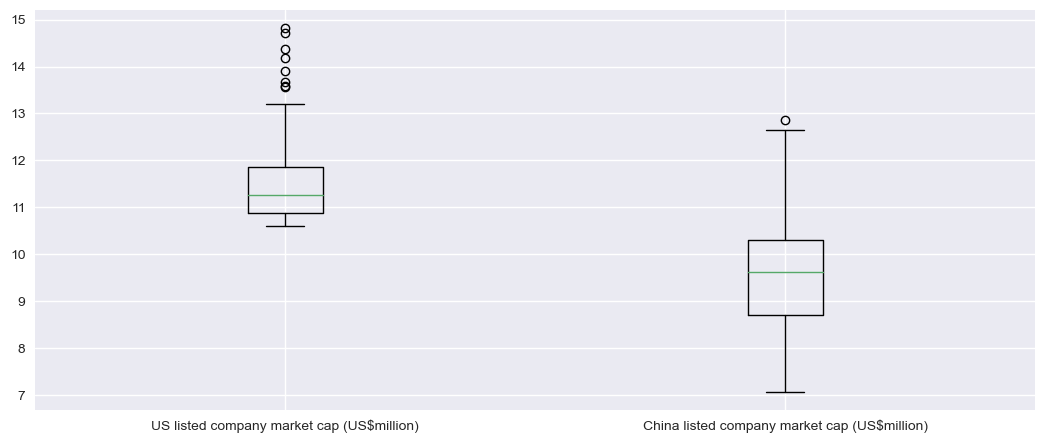

In [24]:
data_1 = np.array(np.log(datas_US['marketCap'].dropna()))
data_2 = np.array(np.log(datas_CN['marketCap'].dropna()))
data = [data_1, data_2]

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(data)

ax.set_xticklabels(['US listed company market cap (US$million)',
                    'China listed company market cap (US$million)'])

plt.show()

C:\Users\David Lau\AppData\Local\Temp\ipykernel_17800\1887302990.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datas_US.corr(), cmap="RdYlBu_r", annot=True,


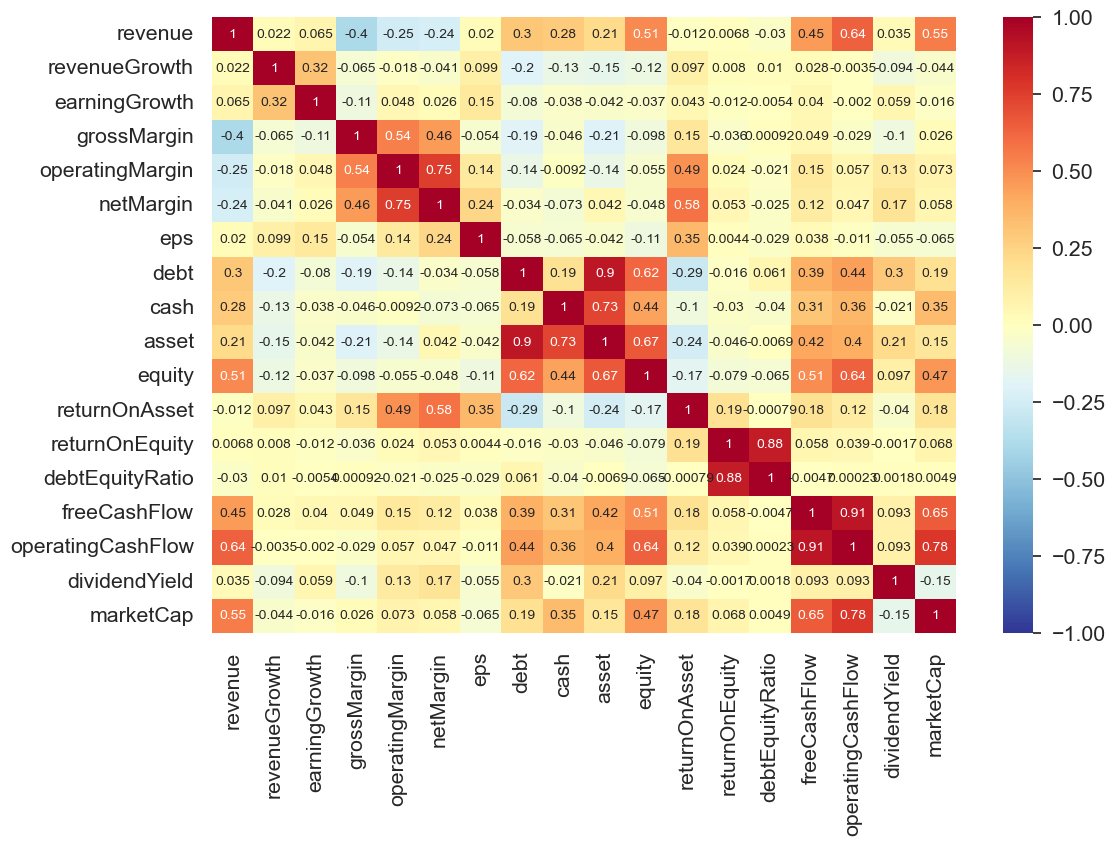

In [25]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.4)
sns.heatmap(datas_US.corr(), cmap="RdYlBu_r", annot=True,
           annot_kws={"size": 10}, vmin=-1, vmax=1)
plt.show()